In [1]:
using PGFPlots
import HDF5, JLD
using EncounterSimulation
using EncounterModel
using EncounterVisualization
using PyPlot
using EncounterFeatures
using EncounterPolicies

INFO: Loading help data...


In [22]:
GOAL_GRID.cutPoints

2-element Array{Array{Float64,1},1}:
 [0.0,55.5556,111.111,166.667,222.222,277.778,333.333,388.889,444.444,500.0]
 [0.0,0.448799,0.897598,1.3464,1.7952,2.24399,2.69279,3.14159]              

In [21]:
GOAL_GRID.cut_counts

2-element Array{Int64,1}:
 10
  8

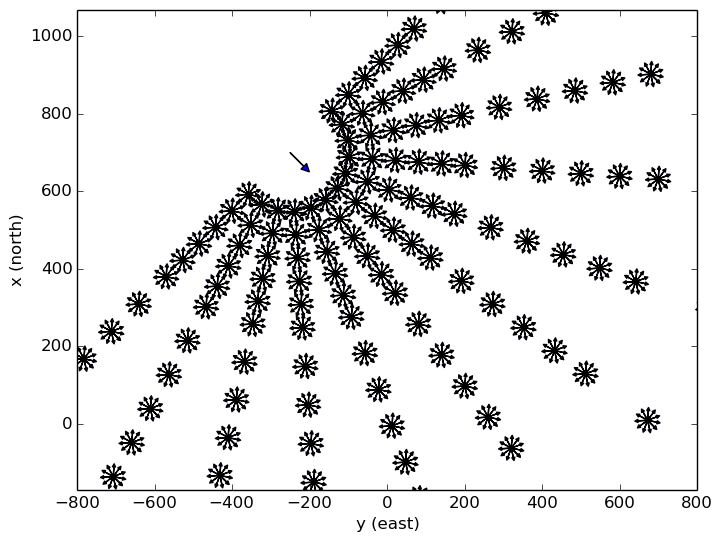

In [29]:
n=100
ownship_heading = 0.0
is = [700.0,-250.0,pi*135/180]
has_deviated=false
ymin = -800.0
ymax = 800.0
xmin = -200.0
xmax = 1100.0
extent=(ymin,ymax,xmin,xmax)

clf()
xlabel("y (east)")
ylabel("x (north)")
ax=gca()

arrow_len = 25
head = 8

for i in 1:INTRUDER_GRID.cut_counts[1]
    for j in 1:INTRUDER_GRID.cut_counts[2]
        for k in 1:INTRUDER_GRID.cut_counts[3]
            intruder_heading = is[3]
            heading_to_point = intruder_heading + INTRUDER_GRID.cutPoints[2][j]
            d = INTRUDER_GRID.cutPoints[1][i]+SIM.legal_D
            point_location = is[1:2] + d*[cos(heading_to_point),sin(heading_to_point)]
            arrow_dir = intruder_heading + INTRUDER_GRID.cutPoints[3][k]
            odx = arrow_len*cos(arrow_dir)
            ody = arrow_len*sin(arrow_dir)
            ax[:arrow](point_location[2],point_location[1],ody,odx,head_width=head,head_length=head)
        end
    end
end

idx = 50*cos(is[3])
idy = 50*sin(is[3])
ax[:arrow](is[2], is[1], idy, idx, head_width=20, head_length=20)
axis("equal")
xlim(ymin,ymax)
ylim(xmin,xmax)
# savefig("/home/zach/Devel/CDC_Paper/figures/policy.pdf")
savefig("/home/zach/Devel/ASL/papers/2016/Sunberg.Pavone.Kochenderfer.ICRA16/figures/intruder_grid.pdf")

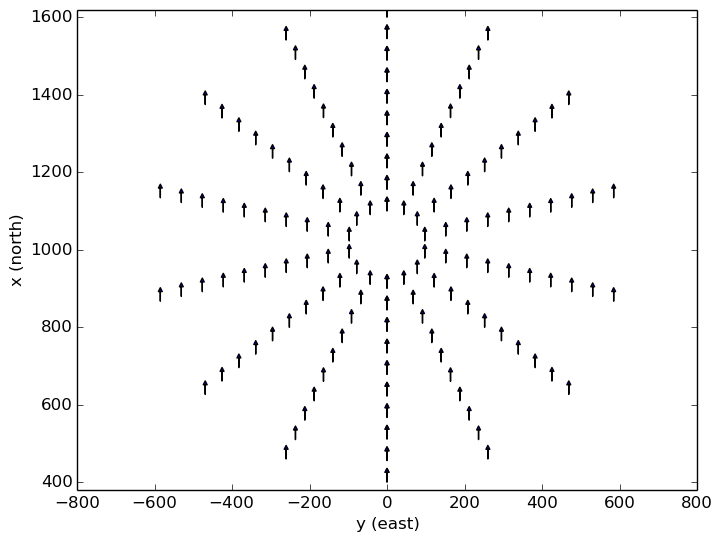

In [28]:
n=100
ownship_heading = 0.0
is = [700.0,-250.0,pi*135/180]
has_deviated=false
ymin = -800.0
ymax = 800.0
xmin = 300.0
xmax = 1700.0
extent=(ymin,ymax,xmin,xmax)

clf()
xlabel("y (east)")
ylabel("x (north)")
ax=gca()

arrow_len = 25
head = 10

for i in 1:GOAL_GRID.cut_counts[1]
    for j in 1:GOAL_GRID.cut_counts[2]
        angle_to_point = GOAL_GRID.cutPoints[2][j]+pi
        d = SIM.goal_radius + GOAL_GRID.cutPoints[1][i]
        point_location = SIM.goal_location + [d*cos(angle_to_point), d*sin(angle_to_point)]
        odx = arrow_len
        ody = 0.0
        ax[:arrow](point_location[2],point_location[1],ody,odx,head_width=head,head_length=head)
    end
end

for i in 1:GOAL_GRID.cut_counts[1]
    for j in 1:GOAL_GRID.cut_counts[2]
        angle_to_point = -GOAL_GRID.cutPoints[2][j]+pi
        d = SIM.goal_radius + GOAL_GRID.cutPoints[1][i]
        point_location = SIM.goal_location + [d*cos(angle_to_point), d*sin(angle_to_point)]
        odx = arrow_len
        ody = 0.0
        ax[:arrow](point_location[2],point_location[1],ody,odx,head_width=head,head_length=head)
    end
end

axis("equal")
xlim(ymin,ymax)
ylim(xmin,xmax)
# savefig("/home/zach/Devel/CDC_Paper/figures/policy.pdf")
savefig("/home/zach/Devel/ASL/papers/2016/Sunberg.Pavone.Kochenderfer.ICRA16/figures/goal_grid.pdf")